## **Outline**

In this notebook, we present some results related to generating functions thar are useful to study percolation transitions in complex networks

The following cell allows numbering equations

In [5]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## **Generating function basics**

### **Generating functions for the degree distribution**

Let $p_k$ be the degree distribution of the network. Then, we define its generating function as 

$$
G_0(z) = \sum_{k=0}^{\infty} p_k z^k.
$$

As $p_k$ is assumed to be properly normalized, then we have 

$$
G_0(1) =  \sum_{k=0}^{\infty} p_k = 1.
$$

As $p_k$ is normalized and positive definite, $G_0(z)$ is absolutely convergent in the region $|z|\leq 1$. [TODO: prove this].

The generating function allows us to obtain the values of the corresponding probabilities in terms of its derivatives, as

$$
p_k = \dfrac{1}{k!} \dfrac{d^kG_0}{dz^k}\Bigr|_{z=0}.
$$

Also, the moments of the distribution can be also obtained as

$$
\langle k^m \rangle = \sum_{k=0}^{\infty} k^m p_k = \left[ \left( z\dfrac{d}{dz}\right)^m G_0(z) \right]_{z=1},\quad \text{ for } m\in \mathbb{N}.
$$

In particular, the mean degree can be computed as 

$$
\langle k \rangle = G_0'(1).
$$

We can think of $p_k$ as the probability that a node chosen unformly at random has degree $k$. Now, if instead of choosing a node, we select an edge uniformly at random and follow it to one of its ends, then the probability that the arriving node has degree $k$ is

$$
q_k = \dfrac{(k+1)p_{k+1}}{\sum_{k=0}^{\infty} (k+1) p_{k+1}} = \dfrac{(k+1)p_{k+1}}{\sum_{k=0}^{\infty} k p_k} = \dfrac{(k+1)p_{k+1}}{\langle k \rangle}.
$$


The distribution $q_k$ is known as the excess degree distribution, and its generating function is

$$
G_1(z) = \sum_{k=0}^{\infty} q_k z^k = \dfrac{1}{\langle k \rangle} \sum_{k=0}^{\infty} (k+1)p_{k+1} z^k = \dfrac{G'_0(z)}{G'_0(1)}.
$$


**Example: Erdös-Rényi graphs**

In an Erdös-Rényi graph, each link is present with probability $p$. Then, the degree distribution of such networks is 

$$
p_k = {N \choose k} p^k (1-p)^{N-k},
$$

where $N$ is the number of nodes.

The generating function of the degree distribution is then given by

$$
G_0(z) = \sum_{k=0}^{N} {N \choose k} p^k (1-p)^{N-k} z^k = (1-p + pz)^N.
$$

For a sparse network, $p = c/N$, with $c$ independent of $N$. In that case, the limit $N\rightarrow \infty$ implies that

$$
G_0(z) = e^{c(z-1)}.
$$

With a similar analysis it can be shown that this special case satisfies $G_1(z) = G_0(z)$.

### **Component sizes**

Let $t$ be the number of vertices reachable from a given edge. Let also $\rho_t$ and $H_1(z) = \sum_t \rho_t z^t$ be the probability distribution of $t$ and its generating function. 

[TODO: Understand why the following argument is only valid for finite-size components.]

The probability that a vertex of degree $k$ belongs to a component of size $s$ is the probability that the number of vertices reachable along each of its $k$ edges sum to $s-1$. This probability, which we will denote as $P(s|k)$, is given by

$$
P(s|k) = \sum_{t_1=1}^{\infty} \dots  \sum_{t_k=1}^{\infty} \delta\left( s-1, \sum_{m=1}^k t_k \right) \prod_{m=1}^k \rho_{t_m}.
$$

Then, the probability distribution $\pi_s$ of a randomly chosen node belonging to a component of size $s$ is $\pi_s = \sum_k p_k P(s|k)$ and the corresponding generating function is

$$
\begin{align}
H_0(z) &= \sum_{s=1}^{\infty} \pi_s z^s \nonumber \\
&= \sum_{s=1}^{\infty} \sum_{k=0}^{\infty} p_k P(s|k) z^s \nonumber \\
&=  \sum_{k=0}^{\infty} p_k \sum_{s=1}^{\infty} z^s \sum_{t_1=1}^{\infty} \dots  \sum_{t_k=1}^{\infty} \delta\left( s-1, \sum_{m=1}^k t_k \right) \prod_{m=1}^k \rho_{t_m} \nonumber \\
&=  z \sum_{k=0}^{\infty} p_k \sum_{t_1=1}^{\infty} \dots  \sum_{t_k=1}^{\infty} z^{\sum_m t_m} \prod_{m=1}^k \rho_{t_m} \nonumber \\
&= z \sum_{k=0}^{\infty} p_k \left[\sum_{s=1}^{\infty} z^t \rho_t\right]^k \nonumber \\
&= z \sum_{k=0}^{\infty} p_k \left[H_1(z)\right]^k \nonumber \\
&= zG_0(H_1(z)).
\end{align}
$$

By a similar argument, we can also obtain the relation

$$
\begin{equation} \label{eq:H1_self_consinstent}
H_1(z) = zG_1(H_1(z)). 
\end{equation}
$$

As $H_0(1)$ represents the sum of the sizes of all the finite components, then the giant component can be simply obtained as 

$$
S = 1-H_0(1) = 1- G_0(u),
$$

where $u\equiv H_1(1)$ is the smallest non-negative real solution of 

$$
u = G_1(u).
$$

Now we define $\langle s \rangle$ as the average size of the component to which a randomly chosen node belongs. This quantity can be computed as 

$$
\begin{align}
\langle s \rangle &= \dfrac{H'_0(1)}{H_0(1)} \nonumber \\
 &= \dfrac{ G_0(H_1(1)) + G'_0(H_1(1))H'_1(1)}{1-S} \nonumber \\
 &= \dfrac{1}{1-S} \left[  G_0(H_1(1)) + G'_0(H_1(1))\dfrac{G_1(H_1(1))}{1-G'_1(H_1(1))} \right] \\
 &= 1+\dfrac{\langle k \rangle u^2}{[1-S][1-G'_1(u)]},
\end{align}
$$

where in the third equality Eq. \ref{eq:H1_self_consinstent} was used. We can see that $\langle s \rangle$ diverges when $G'_1(u) = 1$. This singularity corresponds to the critical point for the percolation transition, where the giant component appears.

For the particular case of ER networks, it can be shown that

$$
\begin{align}
S &= 1 - e^{-cS}, \\
\langle s \rangle &= \dfrac{1}{1-c+cS}.
\end{align}
$$

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from mpl_settings_v3 import *
%matplotlib inline

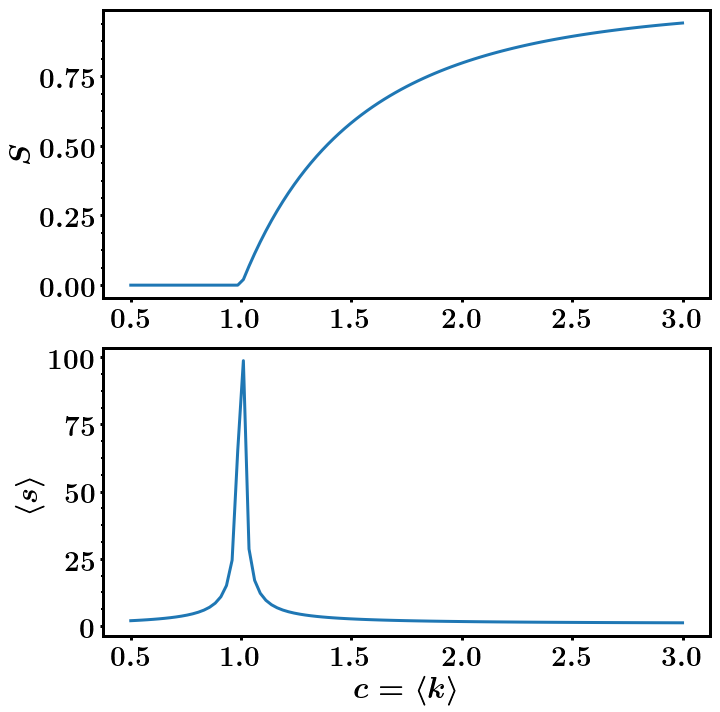

In [54]:
def f(x, c):
    return 1 - x - np.exp(-c*x)

def fprime(x, c):
    return c*np.exp(-c*x) - 1

n_values = 99
c_values = np.linspace(0.5, 3, n_values)
S_values = np.zeros(n_values)
meanS_values = np.zeros(n_values)
for i, c in enumerate(c_values):
    sol = root_scalar(f, args=c, fprime=fprime, x0=0.5, method='newton')
    S = sol.root
    #assert 0 <= root <= 1, root
    S_values[i] = S
    meanS_values[i] = 1/(1-c+c*S)  
    
fig, axes = plt.subplots(figsize=(10,10), nrows=2)
ax = axes[0]
#ax.set_xlabel(r'$\langle k \rangle$')
ax.set_ylabel(r'$S$')
ax.plot(c_values, S_values)

ax = axes[1]
ax.set_xlabel(r'$c = \langle k \rangle$')
ax.set_ylabel(r'$\langle s \rangle$')
ax.plot(c_values, meanS_values)

plt.tight_layout()
plt.show()

## **Random site percolation**

Suppose we have a network with a degree distribution $p_k$ and we remove a fraction $f$ of the nodes. After the remotion, the degree of the remaining nodes will decrease. The new degree distribution is given by 

$$
\begin{equation}
p_m(f) = \sum_{k=m}^{\infty} p_k {k \choose m} f^{k-m} (1-f)^{m}.
\end{equation}
$$

Thus, the generating function of the new degree distribution is given by

$$
\begin{align}
G_0(z;f) &= \sum_{m=0}^{\infty} p_m(f) z^m \\
&= \sum_{m=0}^{\infty}\sum_{k=m}^{\infty} p_k {k \choose m} f^{k-m} (1-f)^{m} z^m \\
&= \sum_{k=0}^{\infty} p_k \sum_{m=0}^{k} {k \choose m} f^{k-m} [(1-f)z]^{m} \\
&= \sum_{k=0}^{\infty} p_k \left[f + (1-f) z\right]^k \\
&= G_0[z + (1-z) f].
\end{align}
$$

Similarly, 

$$
\begin{align}
G_1(z;f) &= G_1[z + (1-z) f].
\end{align}
$$

Note that the following identities stand

$$
\begin{align}
G_0(z;0) &= G_0(z) \\
G_0(1;f) &= G_0(1) \\
G'_0(1;f) &= (1-f) G'_0(1),
\end{align}
$$

where the notation $G'_0(z;f)$ represents the derivative with respect to the first argument.

**Percolation transition**

Using an argument similar as before, we define the generating functions $H_0(z;f)$ and $H_1(z;f)$, which satisfy the relations

$$
\begin{align}
H_0(z;f) &= zG_0(H_1(z;f);f) \\
H_1(z;f) &= zG_1(H_1(z;f);f).
\end{align}
$$

With these relations we can compute, as before, the size of the giant component as

$$
S(f) = 1-H_0(1;f) = 1- G_0(u;f),
$$

where $u\equiv H_1(1;f)$ is the smallest non-negative solution of the equation

$$
u(f) = G_1(u;f).
$$

Also, the mean cluster size is given by 

$$
\begin{align}
\langle s \rangle(f) &= \dfrac{H'_0(1;f)}{H_0(1;f)} \nonumber \\
 &= \dfrac{ G_0(H_1(1;f);f) + G'_0(H_1(1;f);f)H'_1(1;f)}{1-S} \nonumber \\
 &= \dfrac{ G_0(u;f) + G'_0(u;f)H'_1(1;f)}{1-S} \nonumber \\
 &= 1+\dfrac{1}{1-S}  G'_0(u;f)\dfrac{G_1(u;f)}{1-G'_1(u;f)}  \nonumber \\
 %&= 1+\dfrac{1}{1-S} (1-f) G'_0(u)\dfrac{u}{1-(1-f)G'_1(u)}  \nonumber \\
 %&= 1+\dfrac{1}{1-S} \dfrac{(1-f) \langle k \rangle u^2}{1-(1-f)G'_1(u)} \nonumber 
\end{align}
$$

By definition, $u$ is represents the sum of the sizes of all finite components. Right at the critical point, no giant component exists, so $u_c \equiv u(f_c)=1$. Then, the critical point $f_c$ can be obtained from the divergence of $\langle s \rangle$ as

$$
\begin{align} \label{eq:fc_random}
1 &= \dfrac{1}{G'_1(1;f_c)} \\
1 &= \dfrac{1}{(1-f_c)G'_1(1)} \\
f_c &= 1 - \dfrac{1}{G'_1(1)}.
\end{align}
$$

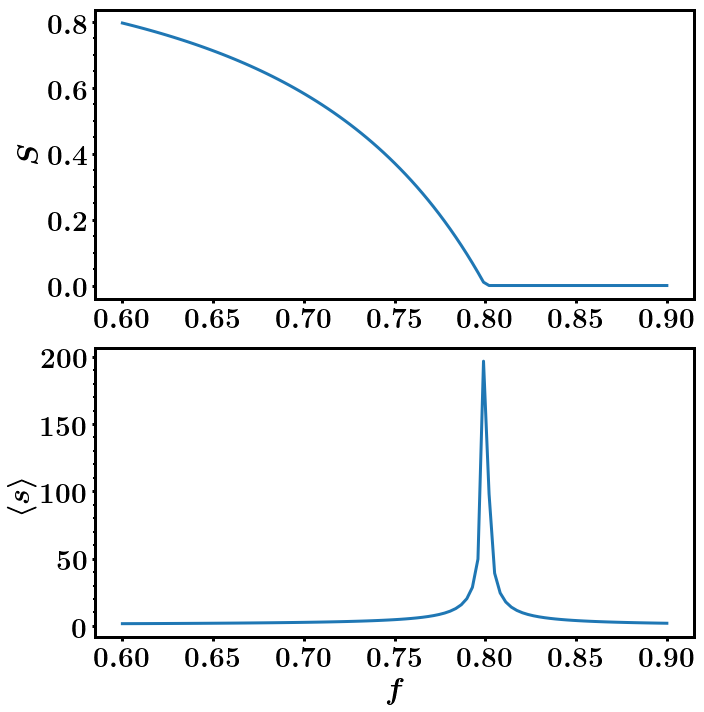

In [68]:
def func(x, f, c):
    return np.exp(c*(1-f)*(x-1)) - x

def func_prime(x, f, c):
    return c*(1-f)*np.exp(c*(1-f)*(x-1)) - 1

n_values = 99
c = 5
f_values = np.linspace(0.6, 0.9, n_values)
S_values = np.zeros(n_values)
meanS_values = np.zeros(n_values)
for i, f in enumerate(f_values):
    sol = root_scalar(func, args=(f, c), fprime=func_prime, x0=0.5, method='newton')
    S = 1 - sol.root
    S_values[i] = S
    meanS_values[i] = 1/(1-c*(1-f)+c*(1-f)*S)  
    
fig, axes = plt.subplots(figsize=(10,10), nrows=2)
ax = axes[0]
#ax.set_xlabel(r'$\langle k \rangle$')
ax.set_ylabel(r'$S$')
ax.plot(f_values, S_values)

ax = axes[1]
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'$\langle s \rangle$')
ax.plot(f_values, meanS_values)

plt.tight_layout()
plt.show()

## **Initial degree site percolation**

### **Callaway approach**

Lets suppose now that only a fraction of nodes in the network are occupied. We state that the occupation probability $q_k$ depends exclusively on the degree of the nodes. Thus, we can build the generating functions

$$
F_0(z) = \sum_{k=0}^{\infty} p_k q_k z^k
$$

and 

$$
F_1(z) = \dfrac{\sum_{k=0}^{\infty} p_k q_k z^{k-1}}{\sum_{k=0}^{\infty} p_k q_k} = \dfrac{F'_0(z)}{\langle k \rangle}
$$

Analogously, 

$$
H_1(z) = 1 - F_1(1) + zF_1[H_1(z)]
$$


$$
H_0(z) = 1 - F_0(1) + zF_0[H_1(z)]
$$

$$
S = 1 - H_0(1) = F_0(1) - F_0(u),
$$

where $u$ is solution of the self-consistency equation

$$
u \equiv H_1(1) = 1 - F_1(1) + F_1(u).
$$

Also,

$$
\begin{align}
\langle s \rangle &= \dfrac{H'_0(1)}{H_0(1)} \nonumber \\
 &= \dfrac{ F_0(H_1(1)) + F'_0(H_1(1))H'_1(1)}{1-S} \nonumber \\
 &= \dfrac{ F_0(u) + F'_0(u)H'_1(1)}{1-S} \nonumber \\
 &= \dfrac{1}{1-S} \left[  F_0(u) + F'_0(u)\dfrac{F_1(u)}{1-F'_1(u)} \right] \\
 &= \dfrac{1}{1-S} \left[  F_0(1) - S + \dfrac{\langle k \rangle F^2_1(u)}{1-F'_1(u)} \right]\\
 &= \dfrac{1}{1-S} \left[  F_0(1) - S + \dfrac{\langle k \rangle (F_1(1)-1+u)^2}{1-F'_1(u)} \right]
\end{align}
$$


Lets consider first the case of random percolation, where $q_k = q$. Then, we have 

$$
\begin{align}
F_0(z) &= qG_0(z), \\
F_1(z) &= qG_1(z).
\end{align}
$$

Then, 

$$
S = q \left[ G_0(1) - G_0(u) \right] = q \left[1- G_0(u) \right],
$$

where 

$$
u = 1 - q G_1(1) + q G_1(u) = 1 - q +  q G_1(u).
$$

$$
\begin{align}
\langle s \rangle &= \dfrac{1}{1-S} \left[  qG_0(1) - S + \dfrac{\langle k \rangle (qG_1(1)-1+u)^2}{1-qG'_1(u)} \right] \\
&= \dfrac{1}{1-S} \left[  q - S + \dfrac{\langle k \rangle (q-1+u)^2}{1-qG'_1(u)} \right]
\end{align}
$$

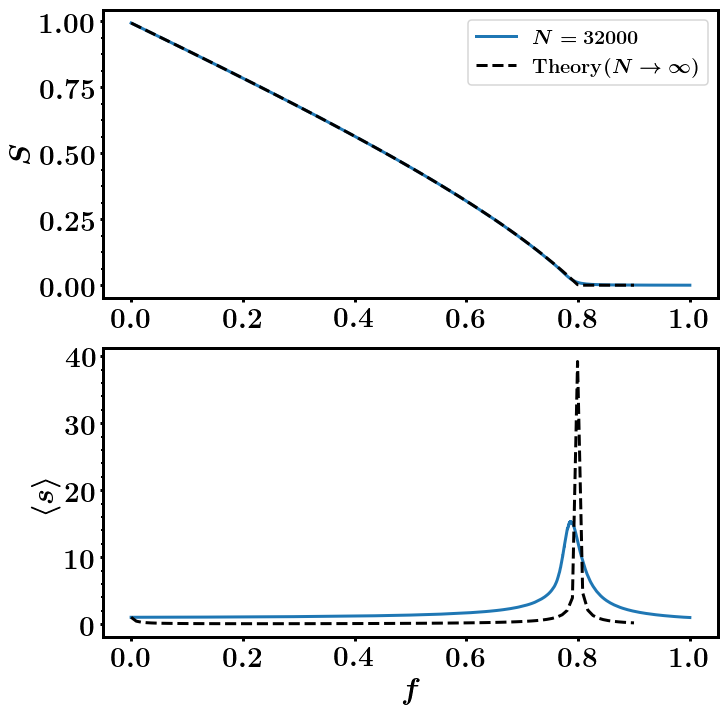

In [91]:
## Erdos-Renyi

def func(x, q, c):
    return 1 - q + q*np.exp(c*(x-1)) - x

def func_prime(x, q, c):
    return  c*q*np.exp(c*(x-1)) - 1

n_values = 99
c = 5
f_values = np.linspace(0., 0.9, n_values)
S_values = np.zeros(n_values)
meanS_values = np.zeros(n_values)
for i, f in enumerate(f_values):
    q = 1-f
    sol = root_scalar(func, args=(q, c), fprime=func_prime, x0=0.5, method='newton')
    u = sol.root
    S = 1 - u
    S_values[i] = S
    meanS_values[i] = (1/(1-S))*(q-S + c*(q-1+u)**2/(1-q*c*np.exp(c*(u-1))))
    

fig, axes = plt.subplots(figsize=(10,10), nrows=2)

ax = axes[0]
ax.set_ylabel(r'$S$')
ax.plot(df.f, df.Sgcc, label=r'$N = 32000$')
ax.plot(f_values, S_values, color='k', linestyle='--', label=r'$\mathrm{Theory }(N\rightarrow \infty)$')
ax.legend(loc='best', fontsize=20)

ax = axes[1]
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'$\langle s \rangle$')
ax.plot(df.f, df.meanS)
ax.plot(f_values, meanS_values, color='k', linestyle='--',)

plt.tight_layout()
plt.show()

In [81]:
import pandas as pd
from auxiliary import get_base_network_name

net_dir = '../networks/ER'

def load_dataframe(attack, size, param, net_type='ER', fast=False, n_seeds=None):
    dir_name = os.path.join('../networks', net_type)
    base_net_name, base_net_name_size = get_base_network_name(net_type, size, param)
    base_csv_file_name = '{}_nSeeds{:d}_cpp.csv'.format(attack, n_seeds)
    csv_file_name = os.path.join(dir_name, base_net_name, base_net_name_size, base_csv_file_name)
    df = pd.read_csv(csv_file_name, index_col=0)
    return df

attack = 'Ran'
n_seeds = 10000
meank = 5
N_values = [32000]

dfs = {}
for N in N_values:
    df = load_dataframe(attack, N, meank, fast=True, n_seeds=n_seeds)
    dfs[N] = df